# Analyzing Data from Multiple Files

<br/>

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Learning Objectives </h2>
</div>
<ul>
<li> Use a library function to get a list of filenames that match a simple wildcard pattern. </li>
<li> Use a for loop to process multiple files. </li>
</ul>
</section>

We now have almost everything we need to process all our data files. The only thing that’s missing is a library with a rather unpleasant name:

The `glob` library contains a single function, also called `glob`, that finds files whose names match a pattern. We provide those patterns as strings: the character `*` matches zero or more characters, while `?` matches any one character. We can use this to get the names of all the HTML files in the current directory:

data\inflammation-01.csv


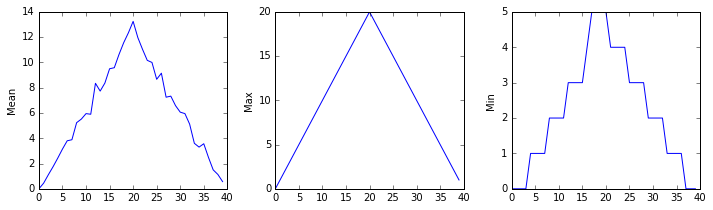

data\inflammation-02.csv


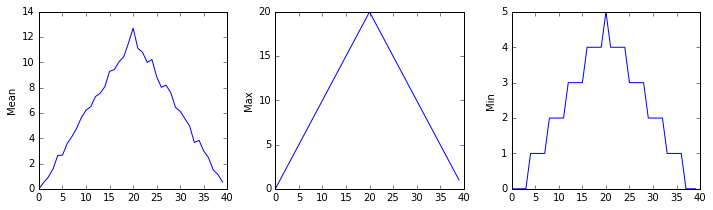

data\inflammation-03.csv


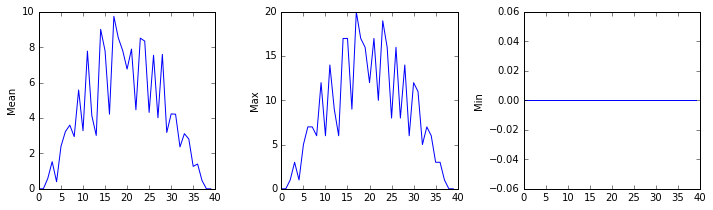

In [3]:
import glob
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Get the list of files to process
filenames = glob.glob('data/inflammation*.csv')

# Select a subset of the fileset
filenames = filenames[0:3]

# Loop over the fileset to plot the data
for f in filenames:
    print(f)

    # Import the data
    data = np.loadtxt(fname=f, delimiter=',')

    #Set up the figure and axes
    fig = plt.figure(figsize=(10.0, 3.0))
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    # Plot the dat and label.
    axes1.plot(data.mean(axis=0))
    axes1.set_ylabel('Mean')
    
    axes2.plot(data.max(axis=0))
    axes2.set_ylabel('Max')

    axes3.plot(data.min(axis=0))
    axes3.set_ylabel('Min')

    # Format plot for better appearance and display
    fig.tight_layout()
    plt.show(fig)

As these examples show, glob.glob’s result is a list of strings, which means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset.

```python
import numpy as np
import matplotlib.pyplot as plt
# Set Ipython for inline plots
% matplotlib inline

# Get the list of files to process
filenames = glob.glob('data/inflammation*.csv')

# Select a subset of the fileset
filenames = filenames[0:3]

# Loop over the fileset to plot the data
for f in filenames:
    print(f)

    # Import the data
    data = np.loadtxt(fname=f, delimiter=',')

    #Set up the figure and axes
    fig = plt.figure(figsize=(10.0, 3.0))
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    # Plot the dat and label.
    axes1.plot(data.mean(axis=0))
    axes1.set_ylabel('Mean')
    
    axes2.plot(data.max(axis=0))
    axes2.set_ylabel('Max')

    axes3.plot(data.min(axis=0))
    axes3.set_ylabel('Min')

    # Format plot for better appearance and display
    fig.tight_layout()
    plt.show(fig)
```

Sure enough, the maxima of the first two data sets show exactly the same ramp as the first, and their minima show the same staircase structure; a different situation has been revealed in the third dataset, where the maxima are a bit less regular, but the minima are consistently zero.